# Solving PDE from PGF
Given: 

- initial condition $g(s, 0) = s^{i}$, if there are $i$ infected at $t = 0$
- boundary condition $g(1, t) = \sum_{k = 0}^{N} p_{k}(t) = 1$ (probs sum to 1)

In [1]:
ClearAll["Global`*"]

In [45]:
(* --- Setup --- *)
Nval = 100;   (* number of nodes *)
I0 = 10;     (* initial infected *)

beta1 = 2.0 / Nval; 
beta2 = 4.0 / Nval^2;
mu = 1;

tMax = 10;

Print["N = ", Nval, ", I0 = ", I0, " beta1 = ", beta1, ", beta2 = ", beta2, ", mu = ", mu, ", tMax = ", tMax];

N = 100, I0 = 10 beta1 = 0.02, beta2 = 0.0004, mu = 1, tMax = 10


In [53]:
pde = D[g[s, t], t] == (s - 1) * (
     beta1 * ( (Nval - 1) * s * D[g[s, t], s] - s^2 * D[g[s, t], {s, 2}] ) +
     (beta2 / 2) * ( (Nval - 2) * s^2 * D[g[s, t], {s, 2}] - s^3 * D[g[s, t], {s, 3}] ) - 
     mu * D[g[s, t], s]
);

In [54]:
ic = g[s, 0] == s^I0;
bc = g[1, t] == 1;

In [56]:
pgfSol = NDSolve[{pde, ic, bc}, g, {t, 0, tMax}, {s, 0, 1}];

NDSolve::bcart: Warning: an insufficient number of boundary conditions have been specified for the direction of independent variable s. Artificial boundary effects may be present in the solution.

In [57]:
gSol = g /. First[pgfSol];

In [58]:
gSol[1, tMax / 2]

1.

In [59]:
(* --- Extract expected values from PGF solution --- *)
dgds[s_, t_] = D[gSol[s, t], s];
expectedValueFunction[t_] := dgds[1, t];

-Graphics-
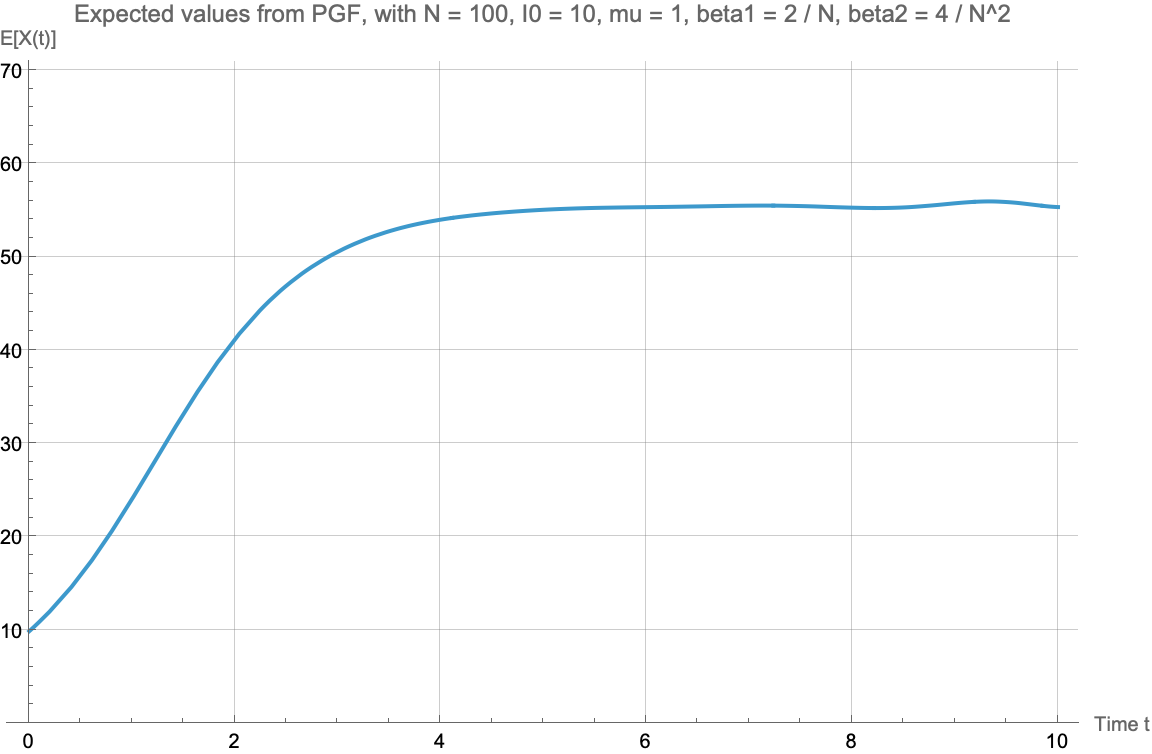

In [67]:
pltLabel = Row[{"Expected values from PGF, with N = ", Nval, ", I0 = ", I0, ", mu = 1, beta1 = 2 / N, beta2 = 4 / N^2"}];
plotExpValFromPGF = Plot[expectedValueFunction[t], {t, 0, tMax},
  AxesLabel -> {"Time t", "E[X(t)]"},
  PlotLabel -> pltLabel,
  GridLines -> Automatic,
  ImageSize -> Large,
  PlotRange -> {0, 71} (* y-axis should start at 0 *)
];
plotExpValFromPGF